# Intro to Bayesian Statistics Lab

Complete the following set of exercises to solidify your knowledge of Bayesian statistics and Bayesian data analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Cookie Problem

Suppose we have two bowls of cookies. Bowl 1 contains 30 vanilla cookies and 10 chocolate cookies. Bowl 2 contains 20 of each. You randomly pick one cookie out of one of the bowls, and it is vanilla. Use Bayes Theorem to calculate the probability that the vanilla cookie you picked came from Bowl 1?

In [2]:
bowl_1_v = 30
bowl_1_c = 10

bowl_2_v = 20
bowl_2_c = 20
##############################
priors = [1 / 2, 1 / 2]
likelihoods = [3/4, 2/4]

def bayes_rule(priors, likehoods):
    marg = sum(np.multiply(priors, likelihoods))
    post = np.divide(np.multiply(priors, likelihoods), marg)
    return post

result = bayes_rule(priors, likelihoods)

print ("Probability of vanilla coockie comming from bowl 1 and 2 are", result, "respectively.")

Probability of vanilla coockie comming from bowl 1 and 2 are [0.6 0.4] respectively.


What is the probability that it came from Bowl 2?

In [3]:
# P(Bowl_2|Vanilla) = 0.4

What if the cookie you had picked was chocolate? What are the probabilities that the chocolate cookie came from Bowl 1 and Bowl 2 respectively?

In [4]:
likelihoods = [1/4, 2/4]

chocoresult = bayes_rule(priors, likelihoods)
print ("Probability of chocolate coockie comming from bowl 1 and 2 are", chocoresult.round(2), "respectively.")

Probability of chocolate coockie comming from bowl 1 and 2 are [0.33 0.67] respectively.


## 2. Candy Problem

Suppose you have two bags of candies:

- In Bag 1, the mix of colors is:
    - Brown - 30%
    - Yellow - 20%
    - Red - 20%
    - Green - 10%
    - Orange - 10%
    - Tan - 10%
    
- In Bag 2, the mix of colors is:
    - Blue - 24%
    - Green - 20%
    - Orange - 16%
    - Yellow - 14%
    - Red - 13%
    - Brown - 13%
    
Not knowing which bag is which, you randomly draw one candy from each bag. One is yellow and one is green. What is the probability that the yellow one came from the Bag 1?

*Hint: For the likelihoods, you will need to multiply the probabilities of drawing yellow from one bag and green from the other bag and vice versa.*

In [5]:
def bayes_rule_candies(p, l):
    marg = sum(np.multiply(p, l))
    post = np.divide(np.multiply(p, l), marg)
    return post

In [6]:
priors_2 = [0.5, 0.5]
likelihoods_green_yellow = [(0.2*0.2), (0.14*0.10)] #Here we operate with the product of Yellow_1*Green_2 and Yellow_2*Green_1

print("These are the results for P of a yellow candie after we extracted a green one from bag_1 and bag_2")
bayes_rule_candies(priors_2, likelihoods_green_yellow).round(2)

These are the results for P of a yellow candie after we extracted a green one from bag_1 and bag_2


array([0.74, 0.26])

What is the probability that the yellow candy came from Bag 2?

In [7]:
# P(bag_2|Yellow) = 0.26

What are the probabilities that the green one came from Bag 1 and Bag 2 respectively?

In [9]:
priors_2 = [0.5, 0.5]
likelihoods_green = [0.1, 0.2] # Here we operate with the % of Green in both bag_1 and bag_2. We are not considering the yellow one as we take the premise
                                      # that the green one is the first to be extracted

print("These are the results for P of a green candie from bag_1 and bag_2")
bayes_rule_candies(priors_2, likelihoods_green).round(2)

These are the results for P of a green candie from bag_1 and bag_2


array([0.33, 0.67])

## 3. Monty Hall Problem

Suppose you are a contestant on the popular game show *Let's Make a Deal*. The host of the show (Monty Hall) presents you with three doors - Door A, Door B, and Door C. He tells you that there is a sports car behind one of them and if you choose the correct one, you win the car!

You select Door A, but then Monty makes things a little more interesting. He opens Door B to reveal that there is no sports car behind it and asks you if you would like to stick with your choice of Door A or switch your choice to Door C. Given this new information, what are the probabilities of you winning the car if you stick with Door A versus if you switch to Door C?

In [11]:
def bayes_rule_monty(p, l):
    marg = sum(np.multiply(p, l))
    post = np.divide(np.multiply(p, l), marg)
    return post

In [12]:
prior = [1/3, 1/3, 1/3]
likelihood_car = [(1/3),(1/3),(1/3)]

bayes_rule_monty(prior, likelihood_car)

#  Before the host open any door, we have the same probability to open the right door
# However, let's check what happens after we open the door

array([0.33333333, 0.33333333, 0.33333333])

In [14]:
# we change the likelihood and prior variable
new_prior = [0.5, 0.5] # We only have 2 door left

# We only have two doors left. Therefore, we cannot consider that third one that it's already opened (remember that our host has showed us
# that the openned door had nothing). Thus, the unopenned and unchoosen door, accumulate the openned door probability.
# So, from 1/3 of probability, we sum it and obtain 2/3 of probability

likelihood_door_open = [(1/3)*(0.5), (2/3)*(0.5)]

bayes_rule_monty(new_prior,likelihood_door_open).round(2) # We are doubling our probability if wue pick the other door so, pick the other one!!

array([0.33, 0.67])

Total time for Loop   1.8665356636047363


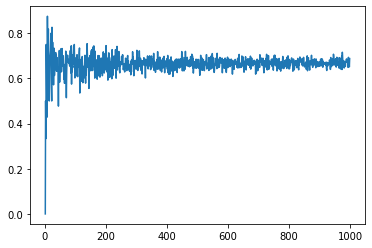

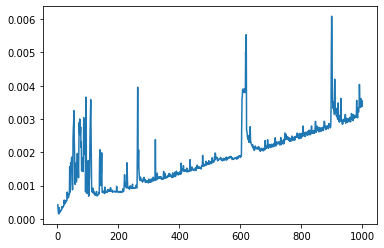

In [22]:
# Monty hall simulator -- https://github.com/siddharthapachhai/PythonSamples/blob/master/MontyHall.py

## 4. Bayesian Analysis 

Suppose you work for a landscaping company, and they want to advertise their service online. They create an ad and sit back waiting for the money to roll in. On the first day, the ad sends 100 visitors to the site and 14 of them sign up for landscaping services. Create a generative model to come up with the posterior distribution and produce a visualization of what the posterior distribution would look like given the observed data.

In [27]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


n_visits = 100
buyers = 14

def generative_model(probability):
    return np.random.binomial(n_visits, probability)

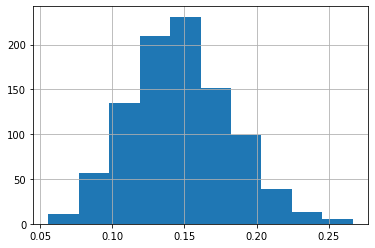

In [37]:
n_draws = 100000
prior = pd.Series(np.random.uniform(0, 1, n_draws))

sim_data = list(map(lambda x: np.random.binomial(n_visits, x), prior))
posteriors = prior[[i for i, x in enumerate(sim_data) if x == buyers]]

posteriors.hist();


Produce a set of descriptive statistics for the posterior distribution.

In [45]:
posteriors.describe()

count    950.000000
mean       0.147343
std        0.034776
min        0.055816
25%        0.123440
50%        0.145182
75%        0.170228
max        0.266690
dtype: float64

What is the 90% credible interval range?

In [52]:
import scipy.stats

confidence = 0.90
mean = posteriors.mean()
sigma = posteriors.std()

interval_range = scipy.stats.norm.interval(confidence, loc=mean, scale=sigma)
interval_range


(0.0901420928479433, 0.20454338146140572)

What is the Maximum Likelihood Estimate?

In [53]:
rounded = posteriors.round(2)
moda = rounded.mode()[0]
moda

0.14